<a href="https://colab.research.google.com/github/btcain44/Applied_Deep_Learning/blob/main/DeepFace_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bi-Weekly Report #7
### Brian Cain
#### DeepFace_Exploration.ipynb

Although most of my time the past couple weeks for this report was focused on the <b>Semantic Segmentation</b> module, and in particular the <b>U-Net</b> model, I thought it would be both fun and important to at least play around with the results of <b>Deep Face</b> covered in the <b>Face Recognition and Detection</b> module in class. 

Below is the link to a website that runs a python opensource facial recognition package. It features models lie VGG-Face, DeepFace, FaceNet, etc. In this notebook I will import this opensource software to play around with some of its functionality in terms classifying whether two faces are from the same person. 

https://viso.ai/computer-vision/deepface/

Install the opensource package and import it. 

In [ ]:
##Install and import the necessary packages
!pip install deepface
from deepface import DeepFace

Mount google drive to this collab notebook so that I can use some face pictures that I have downloaded. 

In [2]:
##Mount drive so we can access some images that we'd like to cycle through
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### VGG-Face Exploration

In the code blocks below, I will utilize the DeepFace package to use VGG-Face to classify whether some images are from the same person or not. 

In [3]:
##Import some necessary plotting/image libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

Below I have created some plots, each row has two pictures of the same person. Each pictures title indicates whether VGG-Face identified the other picture in the row as being the same person. They should all have a title of True in this case given I have selected the data for each row to have a photo of the same person. These are all google images, two of which are prominent college football coaches, then Obama, and Taylor Lautener. 

In [4]:
##Define the images we would like to pull in from google drive
image_sets = [['lincoln_face','lincoln_face2'],
              ['ryan_day','ryan_day2'],
              ['taylor_kid','taylor_adult'],
              ['obama_paint','obama']]

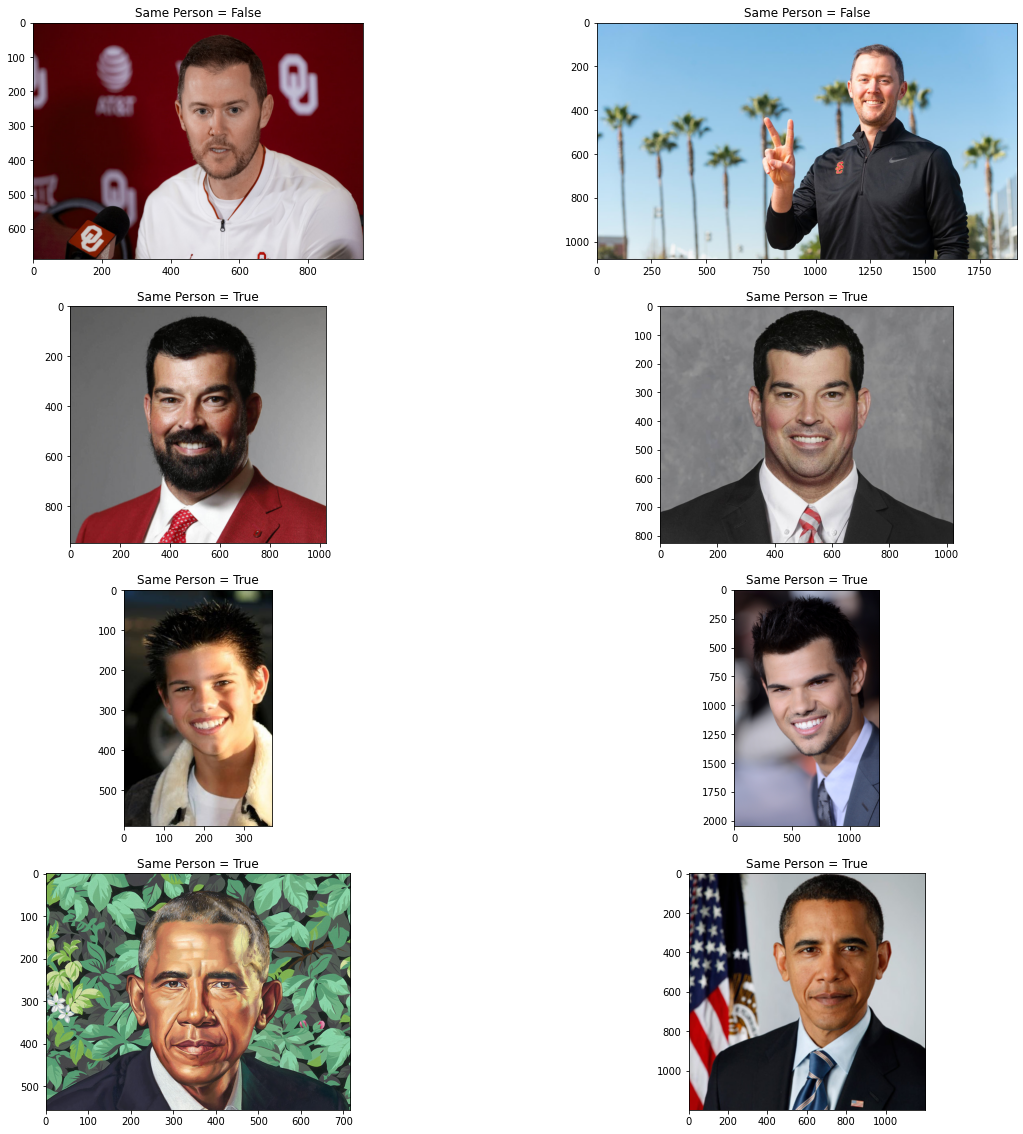

In [6]:
##Create figure to output images onto
rows = 4
columns = 2
fig, ax = plt.subplots(rows,columns,figsize=(20,20))

ct = 0
for i in image_sets:

  ##Pull in the images we are currently on
  img1 = cv2.imread("/content/drive/My Drive/Img/"+i[0]+ ".jpg")
  img2 = cv2.imread("/content/drive/My Drive/Img/"+i[1]+ ".jpg")
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

  ##Display the images
  ax[ct,0].imshow(img1)
  ax[ct,1].imshow(img2)

  ##Perform VGG face algorithm to determine if these are the same people
  verification = DeepFace.verify(img1_path = "/content/drive/My Drive/Img/"+i[0]+".jpg", 
                               img2_path = "/content/drive/My Drive/Img/"+i[1]+".jpg")
  
  ##Display in the title whether or not the picture is verified
  ax[ct,0].set_title('Same Person = '+str(verification['verified']))
  ax[ct,1].set_title('Same Person = '+str(verification['verified']))

  ct+=1

A couple of quick observations:
* In row 1 I find it interesting that VGG-Face did not correctly classify the images as being of the same person. Visually it is obvious this is the same person, however maybe it is because one picture is outside and one is inside that the light reflecting off the face trips the network up. 
* In row 2 I'm impressed that VGG-Face was able to identify that the two images were of the same person given the facial hair change. This indicates to me that the model is robust and has seen data instances like this before. 
* In row 3 you can see that one picture of Taylor Lautener is at a young age, while the other is an adult picture. VGG-Face correctly classifies that these images are of the same person. This is remarkable because the age gap is noticeable but this indicates VGG-Face is capable of picking up on facial structures that confirm these pictures are of the same people. 
* In row 4, I used a painting of Obama and a regular picture of Obama. I was interested if using a painting would throw the model off, but VGG-Face still successfuly identified that these two images displayed the same person. 

### Change of Results with FaceNet

Based off the VGG-Face results above, I am curious if other models might have more success in correclty classifying Row 1 as being the same person. Below I try my luck with FaceNet. 



Text(0.5, 1.0, 'FaceNet Same Person = False')

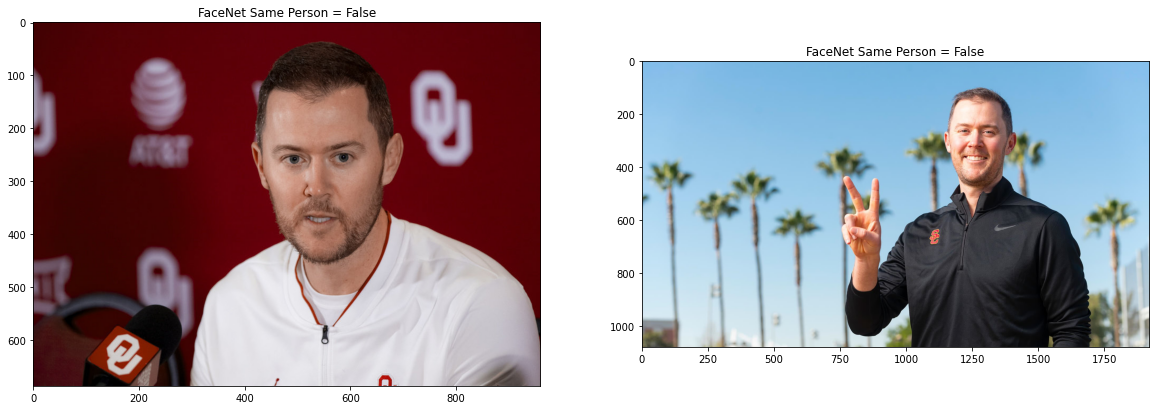

In [9]:
##Create figure to output images onto
rows = 1
columns = 2
fig, ax = plt.subplots(rows,columns,figsize=(20,20))

##Pull in the images we are currently on
img1 = cv2.imread("/content/drive/My Drive/Img/lincoln_face.jpg")
img2 = cv2.imread("/content/drive/My Drive/Img/lincoln_face2.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

##Display the images
ax[0].imshow(img1)
ax[1].imshow(img2)

##Perform VGG face algorithm to determine if these are the same people
verification = DeepFace.verify(img1_path = "/content/drive/My Drive/Img/lincoln_face.jpg", 
                               img2_path = "/content/drive/My Drive/Img/lincoln_face2.jpg",model_name='Facenet')
  
##Display in the title whether or not the picture is verified
ax[0].set_title('FaceNet Same Person = '+str(verification['verified']))
ax[1].set_title('FaceNet Same Person = '+str(verification['verified']))

Still no luck, so lets try DeepFace now. 

### Change of Results with DeepFace

Text(0.5, 1.0, 'DeepFace Same Person = False')

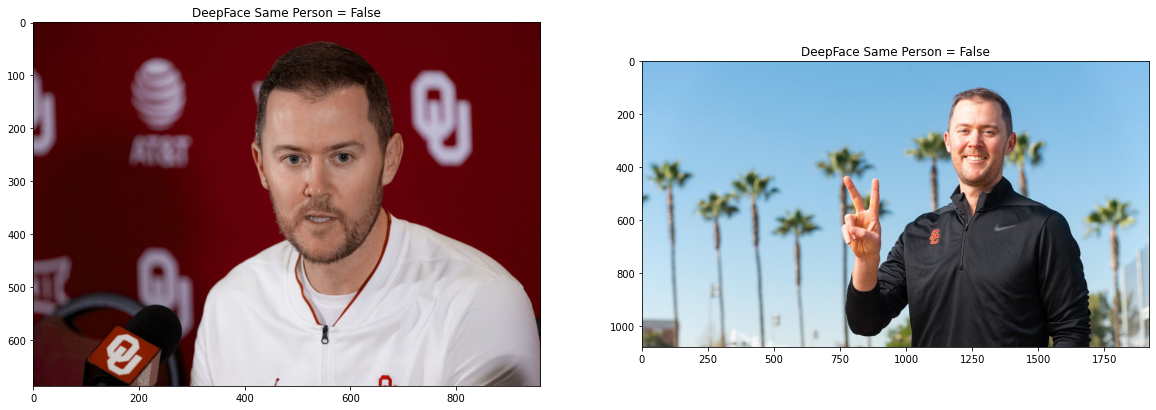

In [25]:
##Create figure to output images onto
rows = 1
columns = 2
fig, ax = plt.subplots(rows,columns,figsize=(20,20))

##Display the images
ax[0].imshow(img1)
ax[1].imshow(img2)

##Perform VGG face algorithm to determine if these are the same people
verification = DeepFace.verify(img1_path = "/content/drive/My Drive/Img/lincoln_face.jpg", 
                               img2_path = "/content/drive/My Drive/Img/lincoln_face2.jpg",model_name='DeepFace')
  
##Display in the title whether or not the picture is verified
ax[0].set_title('DeepFace Same Person = '+str(verification['verified']))
ax[1].set_title('DeepFace Same Person = '+str(verification['verified']))

Still even with DeepFace, another state of the art model covered in class, there is no luck at correctly classifying these two images as the same. One way to possibly understand why is to evaluate what the model might be seeing. I will explore this in the next section. 

### Whats the Face Recognition Model Seeing

In the DeepFace open source package I am using, there is a functionality called analyze which attempts to predict things like emotion, age, and gender from a persons face. I will use this functionality on the missclassified instances above to try and determine if specifically the VGG-Face model is seeing drastically different characteristics for the face of the person in these two images which then is throwing off its prediction. 

Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


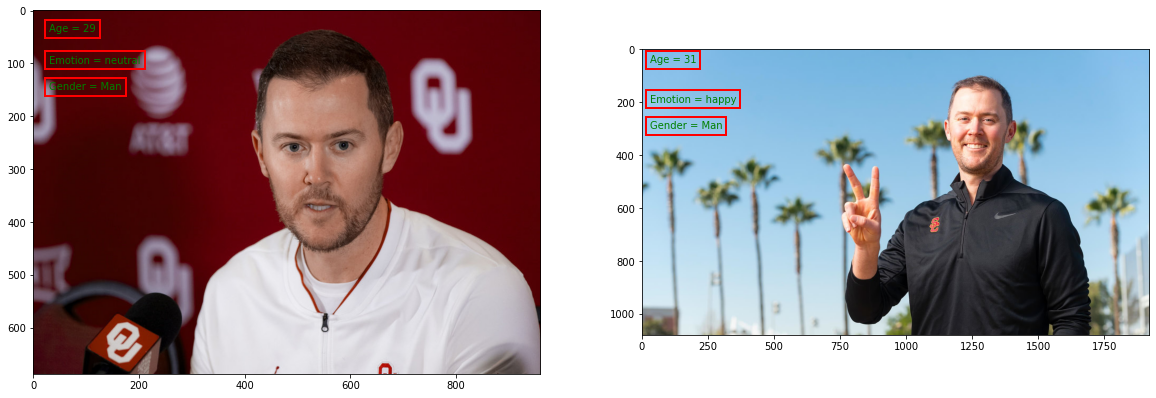

In [24]:
##Obtain micro information about image 1
img1_analysis = DeepFace.analyze(img_path = "/content/drive/My Drive/Img/lincoln_face.jpg", 
                                 actions = ["age", "gender", "emotion"])
img2_analysis = DeepFace.analyze(img_path = "/content/drive/My Drive/Img/lincoln_face2.jpg", 
                                 actions = ["age", "gender", "emotion"])

##Create figure to output images onto
rows = 1
columns = 2
fig, ax = plt.subplots(rows,columns,figsize=(20,20))

##Plot the image and the information
ax[0].imshow(img1)
ax[0].text(30, 40, 'Age = '+str(img1_analysis['age']),color='green', bbox=dict(fill=False, edgecolor='red', linewidth=2))
ax[0].text(30, 100, 'Emotion = '+str(img1_analysis['dominant_emotion']),color='green', bbox=dict(fill=False, edgecolor='red', linewidth=2))
ax[0].text(30, 150, 'Gender = '+str(img1_analysis['gender']),color='green', bbox=dict(fill=False, edgecolor='red', linewidth=2))
ax[0].imshow(img1)
ax[1].text(30, 50, 'Age = '+str(img2_analysis['age']),color='green', bbox=dict(fill=False, edgecolor='red', linewidth=2))
ax[1].text(30, 200, 'Emotion = '+str(img2_analysis['dominant_emotion']),color='green', bbox=dict(fill=False, edgecolor='red', linewidth=2))
ax[1].text(30, 300, 'Gender = '+str(img2_analysis['gender']),color='green', bbox=dict(fill=False, edgecolor='red', linewidth=2))
ax[1].imshow(img2)

In the results above, I'm not sure that this Analysis functionality really gives much insight into why VGG-Face, FaceNet, and DeepFace missclassify these images as different people. In each image, I have included the predicted age, emotion, and gender gathered from the faces. Both are identified as male, both of similar age, and the only real difference is emotion. My best guess would be that the smiling action in the second image changes the persons facial structure just enough so that the three face models missclassify it. 

## Final Thoughts
Although I didn't have much time after performing the U-Net portion of this report, the brief above experimentation using the opensource DeepFace package was still useful as an introduction to facial recognition algorithms in practice. I'm not certain why the mis-classified case we had above was occuring across the three attempted models, but it goes to show there is plenty of room for improvement in facial recognition algorithms. 